In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# define the number of samples
N = 1000
# define the X matrix with a bias column 
X = np.hstack((np.ones((N,1)),(np.random.rand(N,1)-0.5)*100))


In [41]:
# create a matrix of weights 
b = np.array([[1.],[2.5],[3.7]])

In [42]:
# shape check for sanity
# notice how you have to add another set of brackets to maintain the shape

print(X[:,[1]].shape)
print(X[:,1].shape)

(1000, 1)
(1000,)


In [43]:
# create the Y matrix with our weights and add a BUNCH of noise
Y = np.hstack((X,X[:,[1]]**2))@b+np.random.randn(N,1)*1e3

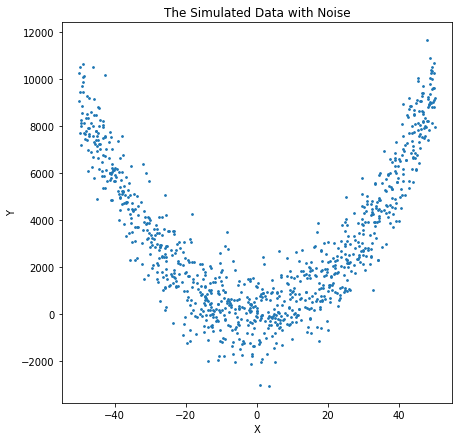

In [47]:
# plot the data and see what it looks like
# I only need to index into the second column of X, since there's a bias column
plt.figure(figsize=(7,7))
plt.scatter(X[:,[1]],Y,s=3)
plt.title('The Simulated Data with Noise')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# The design matrix
$$\phi = [ones,X,X^2]$$

In [48]:
# create the design matrix with a square basis function
phi = np.hstack((X,X[:,[1]]**2))

In [49]:
# Calculate the weight matrix
w = np.linalg.inv(phi.T@phi)@phi.T@Y

In [54]:
# Check the new weights and compare them to the old
print('original weights = {} \ncalculated weights = {}'.format(b.flatten(),w.flatten()))

original weights = [1.  2.5 3.7] 
calculated weights = [-63.44015998   3.81344216   3.77082198]


In [55]:
# calculate the new estimated line that we 
# just fit by estimating the weights of our design matrix
Yhat = phi@w

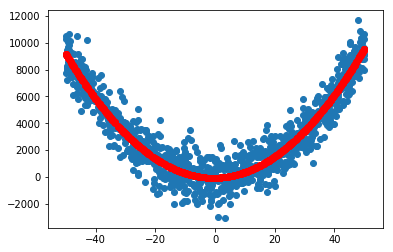

In [57]:
# Sanity check to see where our line is
plt.scatter(X[:,[1]],Y)
plt.scatter(X[:,[1]],Yhat,c='r')